# №3. Транформирование данных

In [2]:
import os
import json

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

import torch
import torchvision

from torch.utils.data import Dataset, DataLoader, random_split
from torchvision.datasets import ImageFolder
from torchvision import transforms

from torchvision.transforms import v2

`v2` -это прокачанная версия `transforms`

Image type: <class 'numpy.ndarray'>
Image size: (1080, 1920, 3)
Image dtype: uint8
Image min/max: 0/255


(-0.5, 1919.5, 1079.5, -0.5)

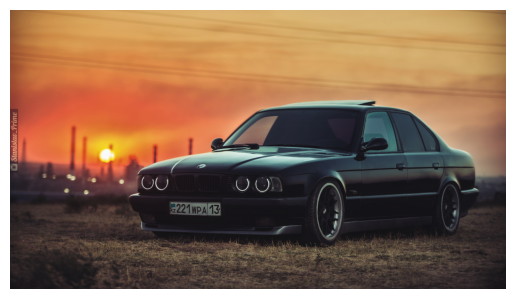

In [8]:
img_path = 'data/my_images/my_love.jpg'
img = np.array(Image.open(img_path))
print(f"Image type: {type(img)}")
print(f"Image size: {img.shape}")
print(f"Image dtype: {img.dtype}")
print(f"Image min/max: {img.min()}/{img.max()}")
plt.imshow(img)
plt.axis('off')

### 1. `transform`

Image type: <class 'torch.Tensor'>
Image size: torch.Size([3, 1080, 1920])
Image dtype: torch.float32
Image min/max: 0.0/1.0


(-0.5, 1919.5, 1079.5, -0.5)

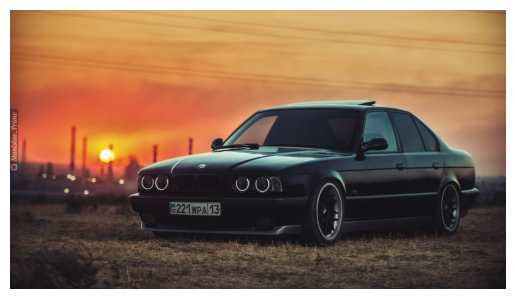

In [15]:
transform = transforms.ToTensor()
img_to_tensor = transform(img)

print(f"Image type: {type(img_to_tensor)}")
print(f"Image size: {img_to_tensor.shape}")
print(f"Image dtype: {img_to_tensor.dtype}")
print(f"Image min/max: {img_to_tensor.min()}/{img_to_tensor.max()}")

plt.imshow(img_to_tensor.permute(1, 2, 0))
plt.axis('off')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.86569875..0.9764426].


Image type: <class 'torch.Tensor'>
Image size: torch.Size([3, 224, 224])
Image dtype: torch.float32
Image min/max: -0.8656987547874451/0.9764425754547119


(-0.5, 223.5, 223.5, -0.5)

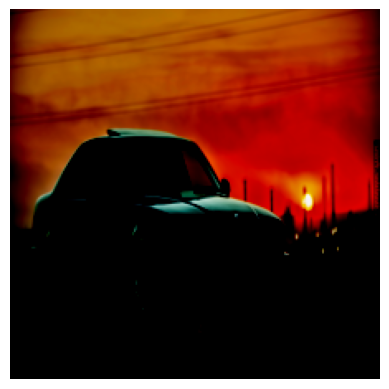

In [19]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize(size=(224, 224)),
    transforms.RandomHorizontalFlip(p=1),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
])
img_to_tensor = transform(img)

print(f"Image type: {type(img_to_tensor)}")
print(f"Image size: {img_to_tensor.shape}")
print(f"Image dtype: {img_to_tensor.dtype}")
print(f"Image min/max: {img_to_tensor.min()}/{img_to_tensor.max()}")

plt.imshow(img_to_tensor.permute(1, 2, 0))
plt.axis('off')

### 2. `transforms.v2`

In [22]:
transform = v2.ToTensor()
img_to_tensor = transform(img)
print(f"Image type: {type(img_to_tensor)}")
print(f"Image size: {img_to_tensor.shape}")
print(f"Image dtype: {img_to_tensor.dtype}")
print(f"Image min/max: {img_to_tensor.min()}/{img_to_tensor.max()}")

Image type: <class 'torch.Tensor'>
Image size: torch.Size([3, 1080, 1920])
Image dtype: torch.float32
Image min/max: 0.0/1.0


d:\code-files\unik\ML\.ML-venv\Lib\site-packages\torchvision\transforms\v2\_deprecated.py:42: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.Output is equivalent up to float precision.
  warnings.warn(


In [23]:
transform = v2.ToImage()
img_to_tensor = transform(img)
print(f"Image type: {type(img_to_tensor)}")
print(f"Image size: {img_to_tensor.shape}")
print(f"Image dtype: {img_to_tensor.dtype}")
print(f"Image min/max: {img_to_tensor.min()}/{img_to_tensor.max()}")

Image type: <class 'torchvision.tv_tensors._image.Image'>
Image size: torch.Size([3, 1080, 1920])
Image dtype: torch.uint8
Image min/max: 0/255


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].


Image type: <class 'torchvision.tv_tensors._image.Image'>
Image size: torch.Size([3, 1080, 1920])
Image dtype: torch.float32
Image min/max: -1.0/1.0


(-0.5, 1919.5, 1079.5, -0.5)

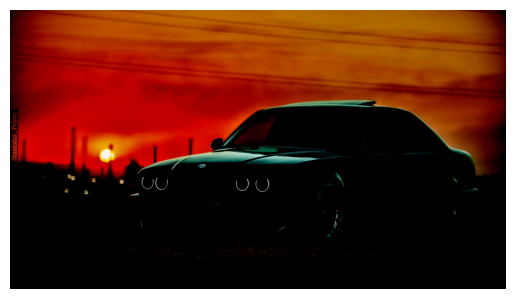

In [26]:
transform = v2.Compose([
    v2.ToImage(),
    v2.ToDtype(torch.float32, scale=True),
    v2.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
])

img_to_tensor = transform(img)

print(f"Image type: {type(img_to_tensor)}")
print(f"Image size: {img_to_tensor.shape}")
print(f"Image dtype: {img_to_tensor.dtype}")
print(f"Image min/max: {img_to_tensor.min()}/{img_to_tensor.max()}")

plt.imshow(img_to_tensor.permute(1, 2, 0))
plt.axis('off')

## 3. Работа с датасетами

In [28]:
DATA_FOLDER = 'data'

### 3.1 MNIST

In [34]:
tranform = v2.Compose([
    v2.ToImage(),
    v2.Grayscale(),
    v2.ToDtype(torch.float32, scale=True),
    v2.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
])

In [35]:
train_mnist = ImageFolder(os.path.join(DATA_FOLDER, 'MNIST', 'generated', 'train'), transform=tranform)
test_mnist = ImageFolder(os.path.join(DATA_FOLDER, 'MNIST', 'generated', 'test'), transform=tranform)
len(train_mnist), len(test_mnist)

(60000, 10000)

In [38]:
train_data, val_data = random_split(train_mnist, [0.9, 0.1])
len(train_data), len(val_data)

(54000, 6000)

### 3.2 Generated images

In [39]:
class GenImagesDataset(Dataset):
    def __init__(self, path:str, transform=None):
        self.path = path
        self.transform = transform
        
        self.list_file_names = os.listdir(self.path)
        if 'coords.json' in self.list_file_names:
            self.list_file_names.remove('coords.json')
            
        self.len_dataset = len(self.list_file_names)
        
        with open(os.path.join(self.path, 'coords.json'), 'r') as f:
            self.coords = json.load(f)
        
    def __len__(self):
        return self.len_dataset
    
    def __getitem__(self, index:int):
        file_name = self.list_file_names[index]
        path_img = os.path.join(self.path, file_name)
        
        img = np.array(Image.open(path_img))
        coords = np.array(self.coords[file_name])
        
        if self.transform is not None:
            img = self.transform(img)
            
        return img, coords

In [52]:
transform = v2.Compose([
    v2.ToImage(),
    v2.ToDtype(torch.float32, scale=True),
    v2.Normalize(mean=[0.5], std=[0.5]),
])

In [53]:
dataset = GenImagesDataset(os.path.join(DATA_FOLDER, 'GEN_IMAGES'), transform=transform)
len(dataset)

100000

In [54]:
train, test, val = random_split(dataset, [0.8, 0.1, 0.1])
len(train), len(test), len(val)

(80000, 10000, 10000)

In [55]:
batch_size=32
train_loader, val_loader, test_loader = (
    DataLoader(train, batch_size=batch_size, shuffle=True),
    DataLoader(val, batch_size=batch_size, shuffle=False),
    DataLoader(test, batch_size=batch_size, shuffle=False)
)

In [65]:
imgs, coords = next(iter(train_loader))
img, coord = imgs[0], coords[0]

print(f"Image type: {type(img)}")
print(f"Image size: {img.shape}")
print(f"Image dtype: {img.dtype}")
print(f"Image min/max: {img.min()}/{img.max()}")

print("-"*30)

print(f"Coord type: {type(coord)}")
print(f"Coord size: {coord.shape}")
print(f"Coord dtype: {coord.dtype}")
print(f"Coord min/max: {coord.min()}/{coord.max()}")

Image type: <class 'torch.Tensor'>
Image size: torch.Size([1, 64, 64])
Image dtype: torch.float32
Image min/max: -1.0/0.5607844591140747
------------------------------
Coord type: <class 'torch.Tensor'>
Coord size: torch.Size([2])
Coord dtype: torch.int32
Coord min/max: 21/28


## 4. Создание собственных трансформаций

In [3]:
class MyTransform(torch.nn.Module):
    def forward(self, sample):
        pass

In [ ]:
class MyNormalize(torch.nn.Module):
    def __init__(self, mean, std):
        super().__init__()
        self.mean = mean
        self.std = std
        
    def forward(self, sample):
        sample = (sample - self.mean) / self.std
        return sample    
        
    # def __call__(self, sample):
    #     sample = (sample - self.mean) / self.std
    #     return sample

In [6]:
transform_1 = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5]),
])

transform_2 = transforms.Compose([
    transforms.ToTensor(),
    MyNormalize(mean=0.5, std=0.5),
])

In [13]:
torch.equal(transform_1(img), transform_2(img))

True